Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Making a random Teacher rating dataset.

In [38]:
np.random.seed(42)

n = 120
prof_ids = [f"Prof_{i}" for i in np.random.randint(1, 95, n)]
age = np.random.randint(25, 65, n)
eval_score = np.random.normal(4, 0.5, n).round(2)
beauty = np.random.normal(6, 1.2, n).round(2)
rating = np.random.normal(4.2, 0.4, n).round(2)
students = np.random.randint(50, 150, n)
gender = np.random.choice(["Male", "Female"], n)
tenure = np.random.choice(["Yes", "No"], n)
division = np.random.choice(["Lower", "Upper"], n)

# Combine into DataFrame
df = pd.DataFrame({
    "prof": prof_ids,
    "age": age,
    "eval": eval_score,
    "beauty": beauty,
    "rating": rating,
    "students": students,
    "gender": gender,
    "tenure": tenure,
    "division": division
})


Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?
Ans) The Teachers Rating Data is a cross-sectional dataset as a time series dataset tracks how one entity’s values change over time (e.g., a teacher’s rating each month for several years) but here we captures different entities at a single point in time (e.g., multiple teachers’ ratings collected during one semester).

In [39]:
print("This dataset represents a cross-sectional study — data collected for multiple teachers at one point in time.")


This dataset represents a cross-sectional study — data collected for multiple teachers at one point in time.


Q2. Find the mean, median, minimum and maximum values for the students

In [40]:
mean_students = df['students'].mean()
median_students = df['students'].median()
min_students = df['students'].min()
max_students = df['students'].max()

print("Mean:", mean_students)
print("Median:", median_students)
print("Minimum:", min_students)
print("Maximum:", max_students)


Mean: 95.175
Median: 93.0
Minimum: 50
Maximum: 149


Q3. Produce the descriptive statistics table.

In [41]:
df.describe()


,age,eval,beauty,rating,students
count,120.000000,120.000000,120.00000,120.000000,120.000000
mean,45.125000,3.944667,6.01300,4.188583,95.175000
std,12.323076,0.524705,1.34395,0.400525,30.067616
min,25.000000,2.560000,1.96000,3.160000,50.000000
25%,33.000000,3.595000,5.13250,3.925000,67.750000
50%,47.000000,3.965000,6.07000,4.215000,93.000000
75%,56.000000,4.250000,6.96500,4.452500,119.000000
max,64.000000,5.140000,9.82000,5.010000,149.000000


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

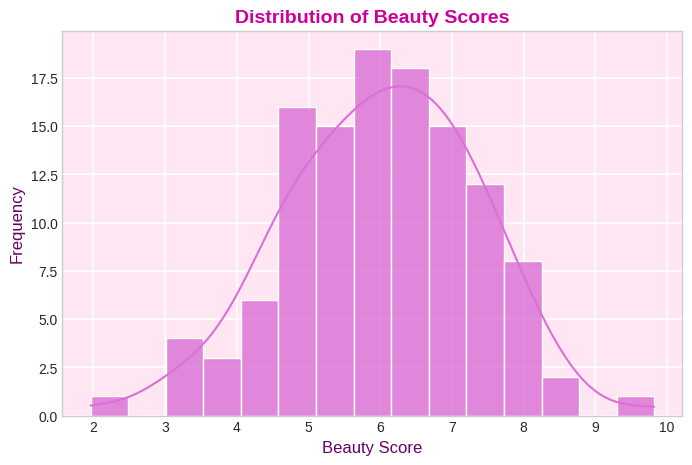

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
plt.style.use('seaborn-v0_8-whitegrid')
plt.gca().set_facecolor('#ffe6f2')


sns.histplot(df['beauty'], bins=15, kde=True, color='orchid', edgecolor='white', alpha=0.8)


plt.grid(True, color='white', linewidth=1.2)
plt.title("Distribution of Beauty Scores", fontsize=14, fontweight='bold', color='#cc0099')
plt.xlabel("Beauty Score", fontsize=12, color='#660066')
plt.ylabel("Frequency", fontsize=12, color='#660066')
plt.show()


-> Most beauty scores are concentrated around the center, particularly between 5 and 7, showing that the majority of scores fall within a moderate range.

-> There are very few outliers, with scores below 3 and above 9 occurring infrequently at the extreme ends of the graph, indicating that exceptionally low or high beauty scores are rare.

-> The distribution appears to be roughly symmetric and does not show significant skewness, as it closely resembles a bell-shaped curve with the highest frequency near a score of 6.

Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors 6

In [43]:
gender_beauty = df.groupby('gender')['beauty'].agg(['mean', 'std', 'count'])
gender_beauty


,mean,std,count
gender,,,
Female,6.062000,1.339553,55
Male,5.971538,1.356676,65


-> The mean beauty scores for female (6.06) and male (5.97) instructors are quite close, indicating no major difference between genders.
-> Both groups show similar variability (standard deviation ≈ 1.34), suggesting comparable spread in beauty ratings, this implies that gender does not significantly influence the average beauty score among instructors in this dataset.

Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [44]:
tenure_table = pd.crosstab(df['gender'], df['tenure'])
tenure_percent = tenure_table.div(tenure_table.sum(axis=1), axis=0) * 100
tenure_percent


tenure,No,Yes
gender,,
Female,50.909091,49.090909
Male,44.615385,55.384615


-> A slightly higher percentage of male instructors (55.38%) are tenured compared to female instructors (49.09%).

-> This suggests that men hold tenure positions somewhat more often than women in this dataset.

However, the difference is not very large, so tenure status appears to be fairly balanced across genders overall.

In [46]:
df.to_csv('teachers_rating.csv', index=False)
print("Successfull")

Successfull
